In [50]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
def showDBSCAN2D(X_data):
    fig = plt.figure(figsize=(10, 50))
    start = 3
    end = 10
    for eps in [0.2, 0.3, 0.4]:
        for i in range(start, end):
            title = "MinPts = {}. Eps = {}.".format(i, eps)
            ax = fig.add_subplot(end - start, 1, i - start + 1)
            dbscan = DBSCAN(eps=eps, min_samples = i)
            dbscan.fit(X_data)
            scatter = ax.scatter(X_data[:, 0], X_data[:, 1], c=dbscan.labels_.astype(float), edgecolor="k")
            ax.xaxis.set_ticklabels([])
            ax.yaxis.set_ticklabels([])
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_title(title)

            legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
            ax.add_artist(legend)

        plt.show()

In [48]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

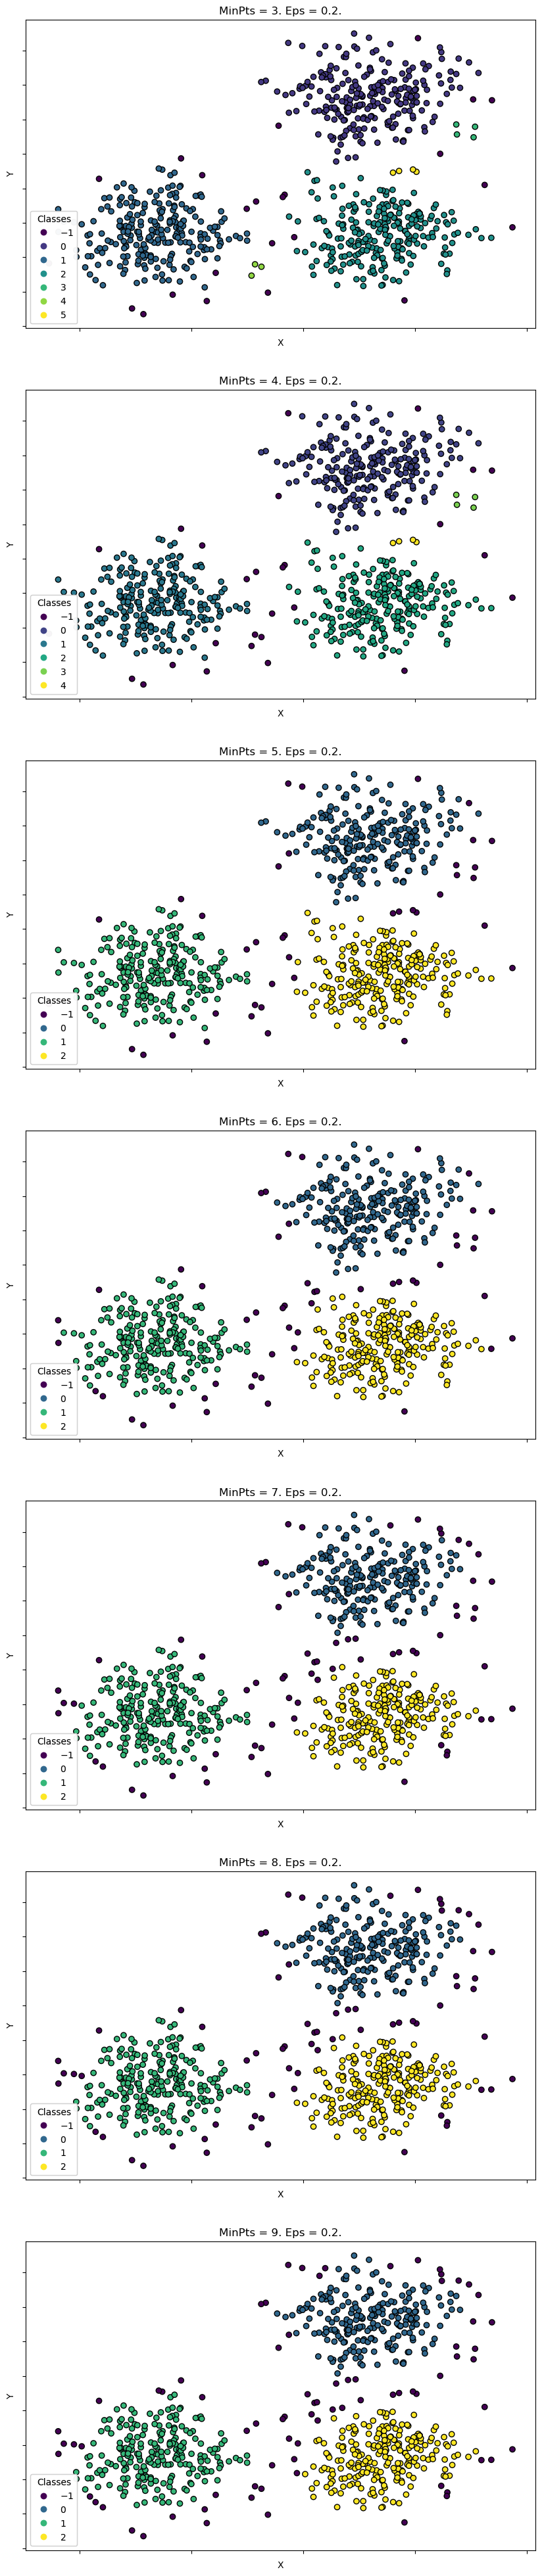

In [51]:
showDBSCAN2D(X)

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [54]:
def showDBSCAN3D(X_data, extra_title):
    fig = plt.figure(figsize=(50, 50))
    start = 3
    end = 10
    for eps in [0.2, 0.3, 0.4]:
        for i in range(start, end):
            title = "MinPts = {}. Eps = {}. {}".format(i, eps, extra_title)
            ax = fig.add_subplot(end - start, 1, i - start + 1, projection="3d")
            dbscan = DBSCAN(eps=eps, min_samples = i)
            dbscan.fit(X_data)
            labels = dbscan.labels_
            scatter = ax.scatter(X_data[:, 3], X_data[:, 0], X_data[:, 2], c=labels.astype(float), edgecolor="k")
            ax.xaxis.set_ticklabels([])
            ax.yaxis.set_ticklabels([])
            ax.zaxis.set_ticklabels([])
            ax.set_xlabel("Petal width")
            ax.set_ylabel("Sepal length")
            ax.set_zlabel("Petal length")
            ax.set_title(title)

            legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
            ax.add_artist(legend)

        plt.show()

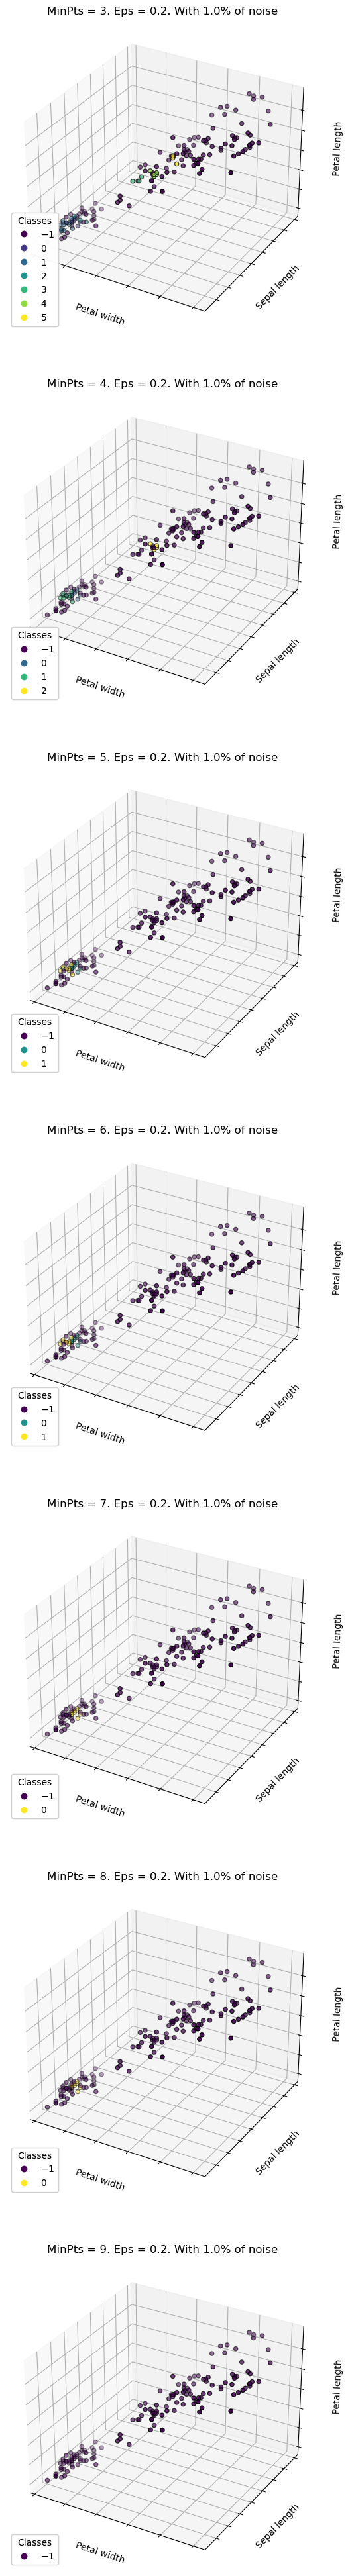

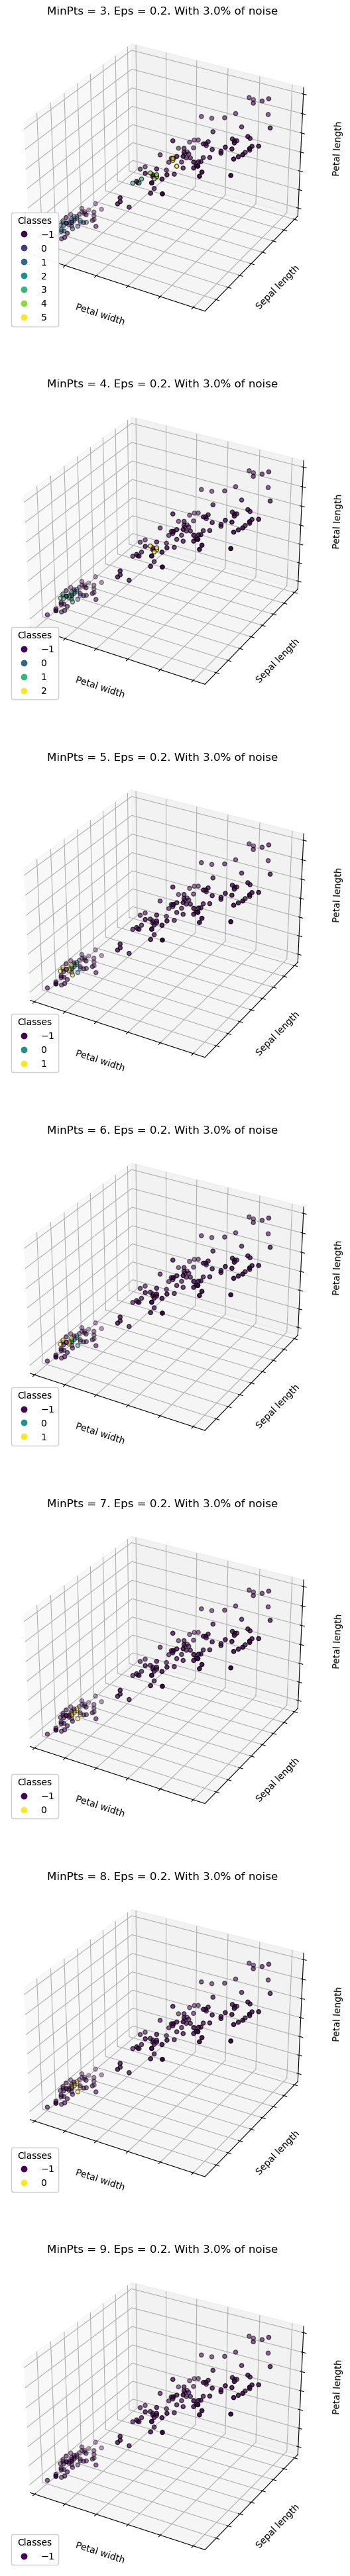

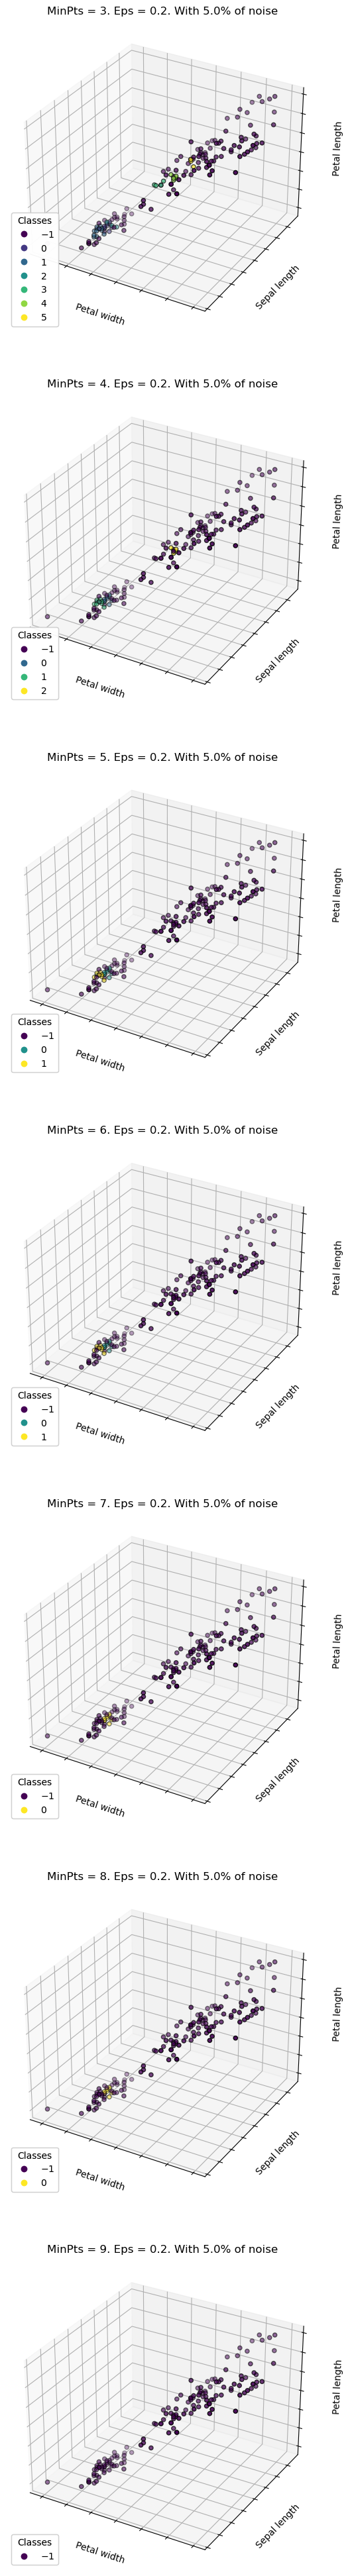

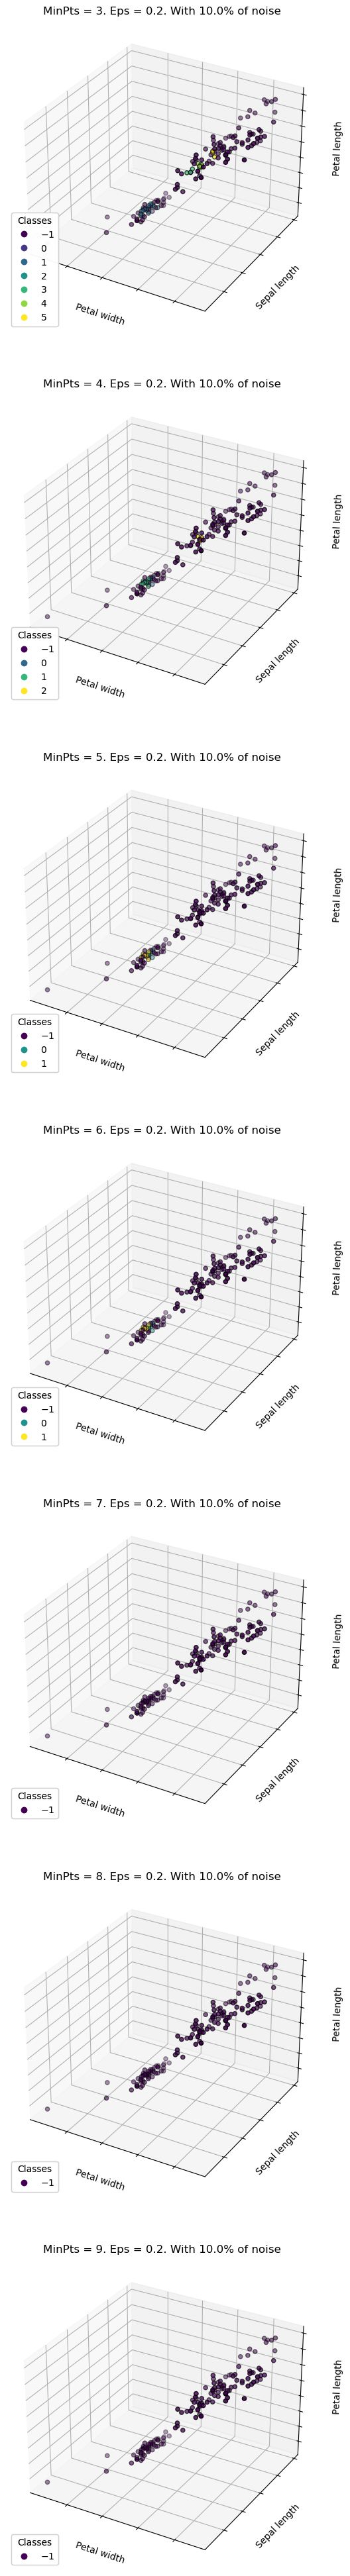

In [55]:
import random

for noisePercent in [0.01, 0.03, 0.05, 0.1]:
    X_noise = X.copy();
    for k in range(1, round(X_noise.shape[0] * noisePercent)):
        i = random.randint(0, X_noise.shape[0] - 1)
        X_noise[i] = X_noise[i] - random.random()
    showDBSCAN3D(X_noise, "With {}% of noise".format(noisePercent * 100))